In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from random import randint

In [2]:
def show(X):
	if X.dim() == 3 and X.size(0) == 3:
		plt.imshow( np.transpose(  X.numpy() , (1, 2, 0))  )
		plt.show()
	elif X.dim() == 2:
		plt.imshow(   X.numpy() , cmap='gray'  )
		plt.show()
	else:
		print('WRONG TENSOR SIZE')

In [3]:
def show_prob_mnist(p):

	p=p.data.squeeze().numpy()

	ft=15
	label = ('zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight','nine')
	#p=p.data.squeeze().numpy()
	y_pos = np.arange(len(p))*1.2
	target=2
	width=0.9
	col= 'blue'
	#col='darkgreen'

	plt.rcdefaults()
	fig, ax = plt.subplots()

	# the plot
	ax.barh(y_pos, p, width , align='center', color=col)

	ax.set_xlim([0, 1.3])
	#ax.set_ylim([-0.8, len(p)*1.2-1+0.8])

	# y label
	ax.set_yticks(y_pos)
	ax.set_yticklabels(label, fontsize=ft)
	ax.invert_yaxis()  
	#ax.set_xlabel('Performance')
	#ax.set_title('How fast do you want to go today?')

	# x label
	ax.set_xticklabels([])
	ax.set_xticks([])
	#x_pos=np.array([0, 0.25 , 0.5 , 0.75 , 1])
	#ax.set_xticks(x_pos)
	#ax.set_xticklabels( [0, 0.25 , 0.5 , 0.75 , 1] , fontsize=15)

	ax.spines['right'].set_visible(False)
	ax.spines['top'].set_visible(False)
	ax.spines['bottom'].set_visible(False)
	ax.spines['left'].set_linewidth(4)


	for i in range(len(p)):
	    str_nb="{0:.2f}".format(p[i])
	    ax.text( p[i] + 0.05 , y_pos[i] ,str_nb ,
	             horizontalalignment='left', verticalalignment='center',
	             transform=ax.transData, color= col,fontsize=ft)



	plt.show()
	#fig.savefig('pic/prob', dpi=96, bbox_inches="tight")

In [4]:
import os.path
def check_mnist_dataset_exists(path_data='../../data/'):
    flag_train_data = os.path.isfile(path_data + 'mnist/train_data.pt') 
    flag_train_label = os.path.isfile(path_data + 'mnist/train_label.pt') 
    flag_test_data = os.path.isfile(path_data + 'mnist/test_data.pt') 
    flag_test_label = os.path.isfile(path_data + 'mnist/test_label.pt') 
    if flag_train_data==False or flag_train_label==False or flag_test_data==False or flag_test_label==False:
        print('MNIST dataset missing - downloading...')
        import torchvision
        import torchvision.transforms as transforms
        trainset = torchvision.datasets.MNIST(root=path_data + 'mnist/temp', train=True,
                                                download=True, transform=transforms.ToTensor())
        testset = torchvision.datasets.MNIST(root=path_data + 'mnist/temp', train=False,
                                               download=True, transform=transforms.ToTensor())
        train_data=torch.Tensor(60000,28,28)
        train_label=torch.LongTensor(60000)
        for idx , example in enumerate(trainset):
            train_data[idx]=example[0].squeeze()
            train_label[idx]=example[1]
        torch.save(train_data,path_data + 'mnist/train_data.pt')
        torch.save(train_label,path_data + 'mnist/train_label.pt')
        test_data=torch.Tensor(10000,28,28)
        test_label=torch.LongTensor(10000)
        for idx , example in enumerate(testset):
            test_data[idx]=example[0].squeeze()
            test_label[idx]=example[1]
        torch.save(test_data,path_data + 'mnist/test_data.pt')
        torch.save(test_label,path_data + 'mnist/test_label.pt')
    return path_data

Warm up

Make a random matrix with 5 rows

In [6]:
A=torch.rand(5,3)
print(A)

tensor([[0.2123, 0.4588, 0.9711],
        [0.3881, 0.2304, 0.9254],
        [0.9281, 0.7211, 0.0828],
        [0.8021, 0.7895, 0.8014],
        [0.6559, 0.4694, 0.9213]])


Choose at random two indices in {0,1,2,3,4}

In [7]:
indices=torch.LongTensor(2).random_(0,5) # generate an integer randomly from 0 to 5-1.
print(indices)

tensor([1, 4])


Extract the corresponding rows of the matrix

In [8]:
minibatch=A[indices]
print(minibatch)

tensor([[0.3881, 0.2304, 0.9254],
        [0.6559, 0.4694, 0.9213]])


Demo

Download the data and print the sizes

In [9]:
data_path=check_mnist_dataset_exists()

MNIST dataset missing - downloading...



Extracting ../../data/mnist/temp/MNIST/raw/train-images-idx3-ubyte.gz to ../../data/mnist/temp/MNIST/raw




Extracting ../../data/mnist/temp/MNIST/raw/train-labels-idx1-ubyte.gz to ../../data/mnist/temp/MNIST/raw




Extracting ../../data/mnist/temp/MNIST/raw/t10k-images-idx3-ubyte.gz to ../../data/mnist/temp/MNIST/raw




Extracting ../../data/mnist/temp/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../../data/mnist/temp/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [10]:
train_data=torch.load(data_path+'mnist/train_data.pt')

print(train_data.size())

train_label=torch.load(data_path+'mnist/train_label.pt')

print(train_label.size())

test_data=torch.load(data_path+'mnist/test_data.pt')

print(test_data.size())

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])


Make a one layer net class

In [11]:
class one_layer_net(nn.Module):

    def __init__(self, input_size, output_size):
        super(one_layer_net , self).__init__()
        self.linear_layer = nn.Linear( input_size, output_size , bias=False)
        
    def forward(self, x):
        y = self.linear_layer(x)
        prob = F.softmax(y, dim=1)
        return prob

Build the net

In [12]:
net=one_layer_net(784,10)
print(net)

one_layer_net(
  (linear_layer): Linear(in_features=784, out_features=10, bias=False)
)


Choose the size of the mini-batches

In [13]:
bs=200

Take the 6th image of the test set:

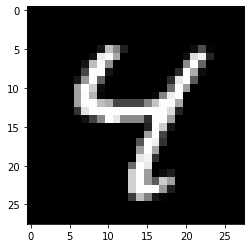

In [14]:
im=test_data[6]
show(im)

Feed it to the UNTRAINED network and print the confidence scores

In [15]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[0.1162, 0.0816, 0.0991, 0.1110, 0.0815, 0.1080, 0.0955, 0.1090, 0.0899,
         0.1084]], grad_fn=<SoftmaxBackward>)


Display visually the confidence scores

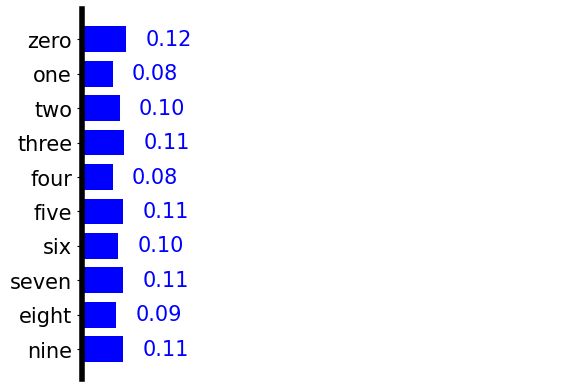

In [16]:
show_prob_mnist(prob)

Train the network (only 5000 iterations) on the train set

In [17]:
criterion = nn.NLLLoss()
optimizer=torch.optim.SGD(net.parameters() , lr=0.01 )

for iter in range(1,5000):
    
    # create a minibatch
    indices=torch.LongTensor(bs).random_(0,60000)
    minibatch_data =  train_data[indices]
    minibatch_label= train_label[indices]
    
    #reshape them to fit the network
    inputs=minibatch_data.view(bs,784)

    # feed the input to the net  
    inputs.requires_grad_()
    prob=net(inputs) 
    
    
    # update the weights (all the magic happens here -- we will discuss it later)
    log_prob=torch.log(prob)
    loss = criterion(log_prob, minibatch_label)    
    optimizer.zero_grad()       
    loss.backward()
    optimizer.step()

Take the 6th image of the test set:

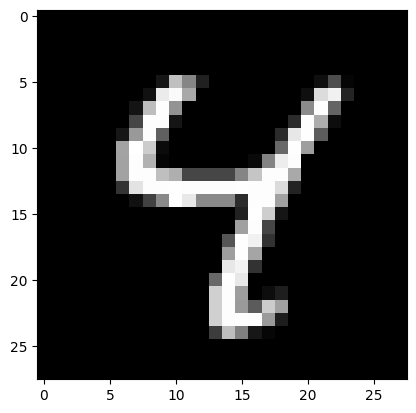

In [18]:
im=test_data[6]
show(im)

Feed it to the TRAINED net:

In [19]:
prob =  net( im.view(1,784)) 
print(prob)

tensor([[2.5564e-04, 1.9771e-04, 2.7244e-04, 1.1135e-02, 8.1517e-01, 4.2000e-02,
         1.3443e-03, 1.9470e-02, 5.7761e-02, 5.2396e-02]],
       grad_fn=<SoftmaxBackward>)


Display visually the confidence scores

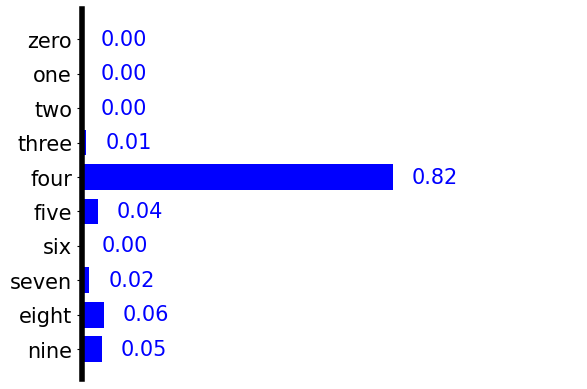

In [20]:
show_prob_mnist(prob)

Choose image at random from the test set and see how good/bad are the predictions

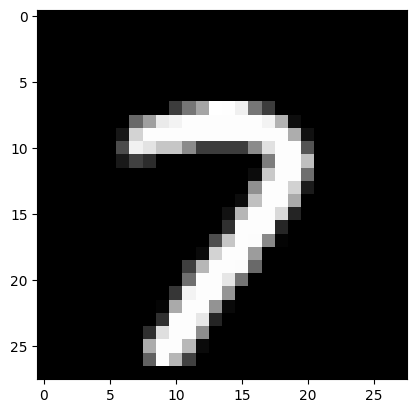

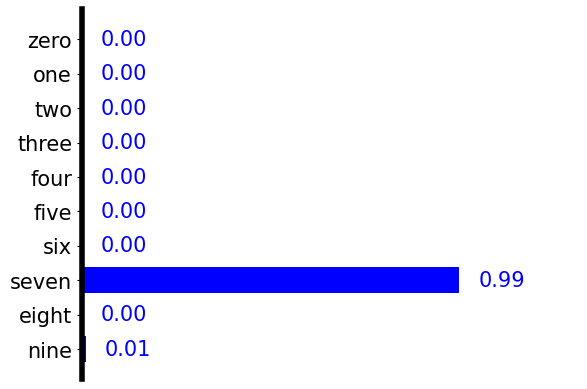

In [ ]:
# choose a picture at random
idx=randint(0, 10000-1)
im=test_data[idx]

# diplay the picture
show(im)

# feed it to the net and display the confidence scores
prob =  net( im.view(1,784)) 
show_prob_mnist(prob)